<a href="https://colab.research.google.com/github/abdullah1234-bit/ML-/blob/main/CNN%20image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

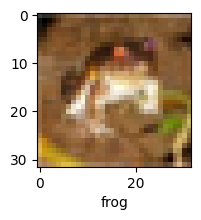

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

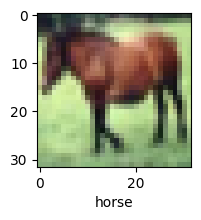

In [13]:
plot_sample(X_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training data**

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Now let us build a convolutional neural network to train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8983 - loss: 0.2855
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9042 - loss: 0.2707
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9107 - loss: 0.2502
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.2510
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9214 - loss: 0.2251
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2104
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9284 - loss: 0.1989
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9343 - loss: 0.1830
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9358 - loss: 0.1801
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9407 - loss: 0.1683
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9428 - loss: 0.1636
Epoch 12/50
1563/1563 ━━━━━━━━

In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6465 - loss: 4.0400


[3.9508066177368164, 0.6531000137329102]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.44439300e-12, 6.82741027e-13, 1.70753213e-16, 9.99954462e-01,
        8.40503719e-13, 7.41834398e-08, 9.91527780e-12, 3.75058915e-19,
        4.54531000e-05, 1.05628024e-13],
       [3.10621858e-16, 4.76941295e-06, 2.93583861e-26, 6.02363554e-31,
        1.16061974e-25, 0.00000000e+00, 3.49061211e-34, 0.00000000e+00,
        9.99995232e-01, 1.21721165e-15],
       [2.52730009e-04, 6.26553774e-01, 1.29160944e-11, 4.57570071e-09,
        2.11987511e-11, 1.82435921e-13, 5.89289381e-12, 1.98011556e-13,
        3.73181254e-01, 1.22814135e-05],
       [9.99999881e-01, 1.57522966e-26, 1.22134793e-07, 7.80906938e-16,
        2.29673760e-22, 1.62016218e-27, 6.90722267e-22, 0.00000000e+00,
        1.39044673e-13, 1.32526136e-20],
       [8.22808598e-25, 1.17421601e-25, 4.59742966e-10, 7.51302779e-01,
        3.60647277e-06, 3.49986397e-13, 2.48693630e-01, 2.88157573e-23,
        3.81706080e-15, 1.29508888e-21]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 3]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

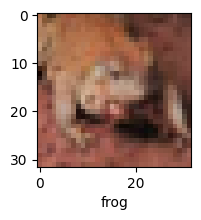

In [25]:
plot_sample(X_test, y_test,5)

In [26]:
classes[y_classes[5]]

'frog'